MODELO ELEGIDO

Epoch 1/100


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7493 - loss: 0.4968 - val_accuracy: 0.8338 - val_loss: 0.3698
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8743 - loss: 0.2958 - val_accuracy: 0.8726 - val_loss: 0.3055
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9035 - loss: 0.2258 - val_accuracy: 0.8698 - val_loss: 0.2657
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9278 - loss: 0.1827 - val_accuracy: 0.8809 - val_loss: 0.2476
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9403 - loss: 0.1543 - val_accuracy: 0.8975 - val_loss: 0.2320
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9486 - loss: 0.1289 - val_accuracy: 0.9030 - val_loss: 0.2168
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9549 - loss: 0.1122 - val_accuracy: 0.9086 - val_loss: 0.2100
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9625 - loss: 0.0987 - val_accuracy: 0.9141 - val_loss: 0.

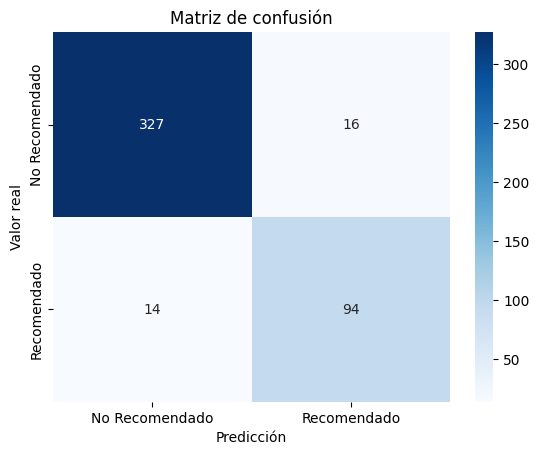

Métricas adicionales:
Exactitud (Accuracy): 0.93
Precisión (Precision): 0.85
Cobertura (Recall): 0.87
F1-Score: 0.86
ROC-AUC Score: 0.97


In [5]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar y preparar los datos
data = pd.read_csv('DatosSingapore.csv')  # Reemplazar con el archivo limpio
data.dropna(inplace=True)  # Eliminar datos faltantes

# Crear la variable objetivo para clasificación
data['recommended'] = np.where(
    (data['price'] <= 200) & 
    (data['review_scores_rating'] >= 4.5) & 
    (data['bedrooms'] >= 1) &
    (data['amenities_number'] >= 5) &
    (data['host_response_rate'] >= 0.79), 1, 0
)

# Separar características (X) y variable objetivo (y)
X = data.drop(columns=['recommended'])
y = data['recommended']

# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Normalizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Crear el modelo de clasificación
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Activación sigmoid para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_classes))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Recomendado', 'Recomendado'], yticklabels=['No Recomendado', 'Recomendado'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')
plt.show()

# Calcular métricas adicionales
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)

# Mostrar métricas adicionales
print("Métricas adicionales:")
print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Cobertura (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")